## This notebook shows how calibrating PS data using the selection mechanism works.
It also compares results to the old getps method.

In [1]:
import numpy as np
from astropy.io import fits
import dysh.util as util
from dysh.util import sq_weighted_avg
from dysh.fits.gbtfitsload import GBTFITSLoad
from copy import deepcopy
import os
import wget
#from dysh.coordinates import Observatory

In [2]:
# The folder with the SDFITS files.
# for testing on GBO replace data_dir with /home/dysh
data_dir = "/bigdisk/data/gbt/"
data_file = data_dir+ "examples/onoff-L/data/TGBT21A_501_11.raw.vegas"

In [3]:
sdf = GBTFITSLoad(data_file)
sdf.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,144,PSR_B0329+54,0.0,Track,1,1.617185,1.420406,5,2,3700,1,327.088873,17.777965
1,152,NGC2415,3784.0,OnOff,1,1.617185,1.420406,5,2,151,1,286.218008,41.62843
2,153,NGC2415,3784.0,OnOff,2,1.617185,1.420406,5,2,151,1,286.886521,41.118134
3,154,3C196,0.0,OnOff,1,1.617185,1.420406,5,2,16,1,302.408541,49.254842
4,155,3C196,0.0,OnOff,2,1.617185,1.420406,5,2,16,1,303.968672,49.159197
5,156,NGC2782,2543.139777,OnOff,1,1.617185,1.420406,5,2,76,1,286.315641,57.760857
6,157,NGC2782,2543.139777,OnOff,2,1.617185,1.420406,5,2,76,1,285.968174,58.709599
7,158,NGC2782,2543.139777,OnOff,1,1.617185,1.420406,5,2,76,1,287.067642,55.736551
8,159,NGC2782,2543.139777,OnOff,2,1.617185,1.420406,5,2,76,1,286.705791,56.681541
9,167,ScoX-1,0.0,OnOff,1,5.375,4.5,8,2,11,1,126.125201,16.227996


### First run the old version of getps.  

In [ ]:
%%time
psscan = sdf._oldgetps([156, 158], ifnum=0, plnum=0)

## Note this *incorrectly* puts all the scans into one PSScan

In [ ]:
print(np.shape(psscan[0]._calibrated))

## Now run the version that uses the Selection object.
It takes longer than the old style.  We still need to profile the new code and see where it is spending time.

In [ ]:
%%time 
psscan2= sdf.getps(scan=[156,158],ifnum=0,plnum=0)

### It *correctly* separates the scan pairs into individual PSScans

In [ ]:
print(np.shape(psscan2[0]._calibrated),np.shape(psscan2[1]._calibrated))

In [ ]:
### now get the same data using selection
sdf.select(scan=[156,158],ifnum=0,plnum=0)
psscan3 = sdf.getps()


In [ ]:
ta2=psscan2.timeaverage()
ta3=psscan3.timeaverage()
ta2.spectral_axis

In [ ]:
psscan2._timeaveraged[0].plot()

In [ ]:
ta2.plot()

In [ ]:
for k,v in psscan[0].timeaverage().meta.items():
    if ta2.meta[k] != v:
        print(f"{k}={v} != {ta2.meta[k]}")

In [ ]:
ta3.plot()

In [ ]:
ta1 = psscan.timeaverage()

In [ ]:
ta2 = psscan2.timeaverage()
ta2_0 = psscan2._timeaveraged[0]
ta2_1 = psscan2._timeaveraged[1]

In [ ]:
ta2_0.velocity_frame, ta1.velocity_frame, psscan[0].calibrated(0).velocity_frame, ta2.velocity_frame

In [ ]:
psscan[0].calibrated(0).spectral_axis

In [ ]:
ta2_0.spectral_axis,ta2_1.spectral_axis

In [ ]:
ta1.spectral_axis,ta2.spectral_axis

---

In [ ]:
# Now 

In [ ]:
sdf.selection.remove(0)
#sdf._selection.select(scan=156,ifnum=0,plnum=0)
#sdf._selection.show()
#psscany=sdf.getps()

In [4]:
ps1 = sdf._oldgetps(scans=[156],ifnum=0,plnum=0)
ps2 = sdf.getps(scan=[156],ifnum=0,plnum=0)
ta1 = ps1.timeaverage()
ta2 = ps2.timeaverage()

/home/mpound/src/dysh/src/dysh/spectra/core.py:352: RuntimeWarning: Mean of empty slice
  meandiff = np.nanmean(calon[chrng] - caloff[chrng])


{'scan': [156], 'ifnum': 0, 'plnum': 0}
case kwargs {'IFNUM': 0, 'PLNUM': 0}


/home/mpound/src/dysh/src/dysh/spectra/core.py:352: RuntimeWarning: Mean of empty slice
  meandiff = np.nanmean(calon[chrng] - caloff[chrng])


TIME AVERAGED DATA [[-0.063301   -0.0774309  -0.0484986  ... -0.03214384  0.03387423
  -0.02065325]]
AVGDATA [-0.063301   -0.0774309  -0.0484986  ... -0.03214384  0.03387423
 -0.02065325] weights [5.18474985]


TIME AVERAGED DATA [[-0.063301   -0.0774309  -0.0484986  ... -0.03214384  0.03387423
  -0.02065325]]
AVGDATA [-0.063301   -0.0774309  -0.0484986  ... -0.03214384  0.03387423
 -0.02065325] weights [5.18474985]


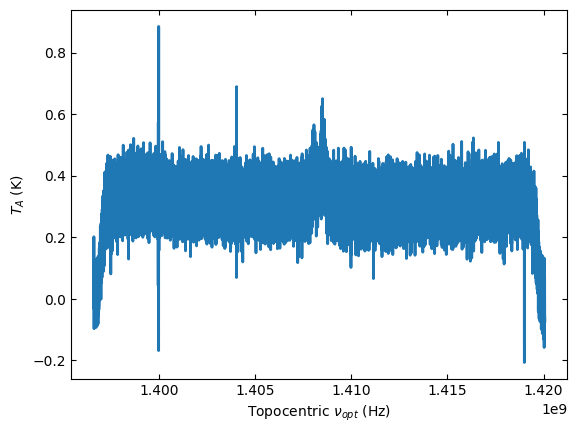

In [5]:
ta1.plot()


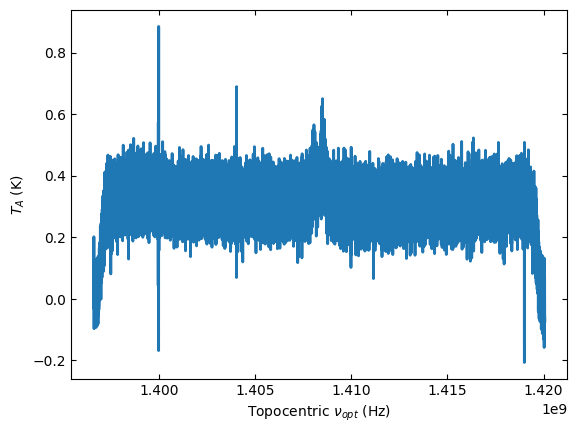

In [6]:
ta2.plot()

In [8]:

np.all(ta1.data == ta2.data)

True

In [ ]:
ta2.observer

In [ ]:
ps2._timeaveraged[0]._location

In [ ]:
psscan2[0][0].timeaverage().plot()

In [ ]:
df = psscan2[0].iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151]]

In [ ]:
# Generate the dysh result.

# psscan is a ScanList.
psscan = sdf.getps(152, plnum=0)
assert len(psscan) == 1
psscan.calibrate()
# psscan_tavg is a list.
psscan_tavg = psscan.timeaverage(weights="tsys")
assert len(psscan_tavg) == 1

In [ ]:
sdf.summary()

In [ ]:
sdf.getps_selection(152,ifnum=0,plnum=0)

In [ ]:
# Load the GBTIDL result.
hdu = fits.open(gbtidl_file)
table = hdu[1].data

In [ ]:
assert psscan_tavg[0].meta["EXPOSURE"] == table["EXPOSURE"][0]

In [ ]:
assert psscan_tavg[0].meta["TSYS"] == table["TSYS"][0]

In [ ]:
assert psscan[0].exposure[0] == 0.9758745431900024

In [ ]:
assert abs(psscan[0].delta_freq[0]) == 715.2557373046875000

In [ ]:
assert psscan[0]._tsys[0] == 17.2400033063068747

In [ ]:
assert psscan[0].exposure[0] * abs(psscan[0].delta_freq[0]) / psscan[0]._tsys[0]**2 == 2.3484463846686591815

In [ ]:
from dysh.spectra.core import tsys_weight
assert tsys_weight(psscan[0].exposure[0], abs(psscan[0].delta_freq[0]), psscan[0]._tsys[0]) == 2.3484463846686591815

In [ ]:
foo = psscan[0].exposure[0]*abs(psscan[0].delta_freq[0])*np.power(psscan[0]._tsys[0], -2.)
bar = psscan[0].exposure[0]*abs(psscan[0].delta_freq[0])/psscan[0]._tsys[0]**2.

In [ ]:
foo?

In [ ]:
bar?

In [ ]:
gbtidl_exposures = np.array([0.9758745431900024,
                             0.9727186456420835,
                             0.9758745431900024])
gbtidl_delta_freq = np.array([715.2557373046875000,
                              715.2557373046875000,
                              715.2557373046875000])
gbtidl_tsys = np.array([17.2400033063068747,
                        17.1714040732369675,
                        17.1566370578116292])
gbtidl_tsyswt = np.array([2.3484463846686592,
                          2.3595923244465413,
                          2.3713246243635990])
gbtdil_tsys2 = np.array([297.2177140014719612,
                         294.8571178463791398,
                         294.3501951334752675])
gbtidl_tsys2_sum = np.array([697.99986590624030214,
                             1393.7424579849857764,
                             2091.7423238912260786]) 2091.742323891226078558
gbtidl_tsys2_sum_here = np.cumsum(gbtdil_tsys2 * gbtidl_tsyswt)

In [ ]:
gbtidl_tsys2_sum_here

In [ ]:
tsys2_sum = np.cumsum(psscan[0]._tsys**2. * psscan[0]._tsys_weight)#.astype("d")

for i in range(3):
    assert psscan[0].exposure[i] == gbtidl_exposures[i]
    assert abs(psscan[0].delta_freq[i]) == gbtidl_delta_freq[i]
    assert psscan[0]._tsys[i] == gbtidl_tsys[i]
    assert psscan[0]._tsys_weight[i] == gbtidl_tsyswt[i]
    assert psscan[0]._tsys[i]**2. == gbtdil_tsys2[i]
    assert tsys2_sum[i] == gbtidl_tsys2_sum[i]
    assert gbtidl_tsys2_sum_here[i] == gbtidl_tsys2_sum[i]

In [ ]:
np.cumsum(psscan[0]._tsys**2. * psscan[0]._tsys_weight)[-1]

In [ ]:
tsys_avg = np.average(psscan[0]._tsys, weights=psscan[0]._tsys_weight)
assert tsys_avg == table["TSYS"][0]

In [ ]:
tsys_avg = sq_weighted_avg(psscan[0]._tsys, axis=0, weights=psscan[0]._tsys_weight)
# assert tsys_avg == table["TSYS"][0]
tsys_avg

In [ ]:
assert tsys_avg.astype(float) == table["TSYS"][0]

In [ ]:
table["TSYS"]

In [ ]:
table["TSYS"][0]

In [ ]:
tsys_avg - table["TSYS"][0]

In [ ]:
tsys_avg - table["TSYS"][0]

In [ ]:
psscan_tavg[0].meta["TSYS"] - table["TSYS"][0]

In [ ]:
assert psscan[0]._tsys_weight[0] == 2.3484463846686591815

In [ ]:
diff = psscan_tavg[0].flux.value.astype("d") - table["DATA"][0]
diff

In [ ]:
psscan_tavg[0].flux.value

In [ ]:
table["DATA"]

In [ ]:
hdu_ = fits.open(data_file)
table_ = hdu_[1].data

In [ ]:
mask_sig = ( table_["SCAN"] == 152 ) & ( table_["PLNUM"] == 0 )
mask_ref = ( table_["SCAN"] == 153 ) & ( table_["PLNUM"] == 0 )
mask_on  = ( table_["CAL"][mask_sig] == "T" )
mask_off = ( table_["CAL"][mask_ref] == "T" )
exp_sig  = table_["EXPOSURE"][mask_sig][::2] + table_["EXPOSURE"][mask_sig][1::2]
exp_ref  = table_["EXPOSURE"][mask_ref][::2] + table_["EXPOSURE"][mask_ref][1::2]
nsmooth  = 1.
exp = exp_sig * exp_ref * nsmooth / (exp_sig + exp_ref * nsmooth)

In [ ]:
exp.sum()

In [ ]:
psscan[0].exposure.sum()

In [ ]:
table_["CAL"][mask]

In [ ]:
table_["DURATION"][mask][::2]

In [ ]:
hdut = fits.open(f"{data_path}/test_exposure.fits")
tablet = hdut[1].data
tablet["EXPOSURE"]

In [ ]:
tablet["EXPOSURE"] - exp.sum()

In [ ]:
psscan_tavg[0].meta["EXPOSURE"] - tablet["EXPOSURE"]

In [ ]:
psscan_tavg[0].meta["EXPOSURE"] - table["EXPOSURE"]

In [ ]:
hdu = fits.open(f"{data_path}/test_int_0.fits")
table = hdu[1].data

In [ ]:
table["DATA"][0] - psscan[0].calibrated(0).flux.value.astype("d")

In [ ]:
assert table["TSYS"] == psscan[0].calibrated(0).meta["TSYS"]
assert table["EXPOSURE"] == psscan[0].calibrated(0).meta["EXPOSURE"]
assert table["CDELT1"] == psscan[0].calibrated(0).meta["CDELT1"]

In [ ]:
for i in range(len(table["DATA"][0])):
    try:
        assert table["DATA"][0][i] == psscan[0].calibrated(0).flux.value[i]
    except AssertionError:
        print(i)

In [ ]:
hdu = fits.open(f"{data_path}/test_gettp_0.fits")
table = hdu[1].data

In [ ]:
gbtidl_data = table["DATA"][0]

In [ ]:
dysh_data = sdf._sdf[0].rawspectra(psscan[0]._bintable_index)[psscan[0]._sigonrows][0]

In [ ]:
np.nansum((gbtidl_data - dysh_data))

In [ ]:
table_ = sdf._sdf[0]._hdu[1].data
mask = (table_["SCAN"] == 152) & \
       (table_["IFNUM"] == 0) & \
       (table_["PLNUM"] == 0) & \
       (table_["CAL"] == "T") & \
       (table_["SIG"] == "T")
mask.sum()


In [ ]:
table_[mask]["DATA"][0]

In [ ]:
sdf.summary()

In [ ]:
hdu = fits.open(f"{data_path}/test_gettp_intnum_0.fits")
table = hdu[1].data

In [ ]:
tp = sdf.gettp(152)

In [ ]:
np.nansum(tp[0].total_power(0).flux.value - table["DATA"])

In [ ]:
hdu = fits.open(f"{data_path}/test_getps_intnum_0.fits")
table = hdu[1].data

In [ ]:
ps = sdf.getps(152)

In [ ]:
(ps[0].calibrated(0).flux.value == table["DATA"][1])

In [ ]:
assert ps[0]._tsys[0] == table["TSYS"][0]
assert ps[0]._tsys[0] == table["TSYS"][1]

In [ ]:
table["DATA"][0]

In [ ]:
table["DATA"][1]